In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns



In [102]:
diamonds = pd.read_csv('./data/diamondsql.csv')
#diamonds['volume'] = (4/3) * np.pi * diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds['length_width_ratio'] = diamonds['x'] / diamonds['y']
diamonds['width_depth_ratio'] = diamonds['y'] / diamonds['z']
diamonds['symmetry_index'] = (diamonds['x'] * diamonds['y'] * diamonds['z']) / (diamonds['x'] + diamonds['y'] + diamonds['z'])
diamonds['brilliance_index'] = diamonds['carat'] / (diamonds['x'] * diamonds['y'] * diamonds['z'])
cut_score = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
diamonds['cut_score'] = diamonds['cut'].map(cut_score)
diamonds['proportion_index'] = (diamonds['x'] / diamonds['y']) * (diamonds['x'] / diamonds['z'])
diamonds['purity_index'] = (diamonds['clarity'].astype('category').cat.codes + diamonds['color'].astype('category').cat.codes) / 2
diamonds['is_from_dubai'] = np.where(diamonds['city'] == 'Dubai', 1, 0)
diamonds['overall_quality'] = diamonds[['symmetry_index', 'brilliance_index', 'cut_score', 'proportion_index', 'purity_index']].mean(axis=1)

diamonds

,index_id,price,city_id,carat,city_id.1,city,index_id.1,cut_id,color_id,clarity_id,...,z,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,...,4.25,1.005891,1.597647,11.029475,0.006139,4,1.616526,5.5,1,4.430428
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,...,2.75,0.993151,1.592727,4.564090,0.006107,3,1.570984,4.5,0,2.728236
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,...,3.65,1.016275,1.515068,7.664655,0.006259,1,1.564785,3.5,0,2.747140
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,...,3.00,0.991525,1.573333,5.344258,0.006187,2,1.546780,1.0,0,1.979445
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,...,3.95,1.006144,1.648101,9.901821,0.006056,5,1.668417,2.5,1,3.815259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,...,4.43,1.008523,1.589165,11.924024,0.006052,5,1.616368,3.5,0,4.409289
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,Madrid,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,...,4.73,1.007273,1.744186,15.231422,0.006229,2,1.769648,2.5,0,4.301460
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,...,4.01,0.992212,1.600998,9.761343,0.006159,5,1.576157,3.0,0,3.868732
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33,89c7286890f7347ab235234e74

In [103]:
diamonds.columns

Index(['index_id', 'price', 'city_id', 'carat', 'city_id.1', 'city',
       'index_id.1', 'cut_id', 'color_id', 'clarity_id', 'cut_id.1', 'cut',
       'clarity_id.1', 'clarity', 'color_id.1', 'color', 'index_id.2', 'depth',
       'table', 'x', 'y', 'z', 'length_width_ratio', 'width_depth_ratio',
       'symmetry_index', 'brilliance_index', 'cut_score', 'proportion_index',
       'purity_index', 'is_from_dubai', 'overall_quality'],
      dtype='object')

In [104]:
diamonds = diamonds.drop(['index_id', 'city_id', 'city_id.1','index_id.1','cut_id', 'color_id', 'clarity_id', 'cut_id.1', 'clarity_id.1', 'color_id.1', 'index_id.2'], axis = 1)

In [105]:
diamonds.head()

,price,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,4268,1.21,Dubai,Premium,VS2,J,62.4,58.0,6.83,6.79,4.25,1.005891,1.597647,11.029475,0.006139,4,1.616526,5.5,1,4.430428
1,505,0.32,Kimberly,Very Good,VS2,H,63.0,57.0,4.35,4.38,2.75,0.993151,1.592727,4.564090,0.006107,3,1.570984,4.5,0,2.728236
2,2686,0.71,Las Vegas,Fair,VS1,G,65.5,55.0,5.62,5.53,3.65,1.016275,1.515068,7.664655,0.006259,1,1.564785,3.5,0,2.747140
3,738,0.41,Kimberly,Good,SI1,D,63.8,56.0,4.68,4.72,3.00,0.991525,1.573333,5.344258,0.006187,2,1.546780,1.0,0,1.979445
4,4882,1.02,Dubai,Ideal,SI1,G,60.5,59.0,6.55,6.51,3.95,1.006144,1.648101,9.901821,0.006056,5,1.668417,2.5,1,3.815259


In [106]:
label_encoder = LabelEncoder()

In [107]:
columns_to_encode = ['city','cut','clarity','color']

In [108]:
diamonds_encoded = diamonds.copy()  # Hacemos una copia del DataFrame original para no modificarlo directamente
for column in columns_to_encode:
    diamonds_encoded[column] = label_encoder.fit_transform(diamonds[column])

In [109]:
diamonds_encoded.head()

,price,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,4268,1.21,2,3,5,6,62.4,58.0,6.83,6.79,4.25,1.005891,1.597647,11.029475,0.006139,4,1.616526,5.5,1,4.430428
1,505,0.32,3,4,5,4,63.0,57.0,4.35,4.38,2.75,0.993151,1.592727,4.564090,0.006107,3,1.570984,4.5,0,2.728236
2,2686,0.71,4,0,4,3,65.5,55.0,5.62,5.53,3.65,1.016275,1.515068,7.664655,0.006259,1,1.564785,3.5,0,2.747140
3,738,0.41,3,1,2,0,63.8,56.0,4.68,4.72,3.00,0.991525,1.573333,5.344258,0.006187,2,1.546780,1.0,0,1.979445
4,4882,1.02,2,2,2,3,60.5,59.0,6.55,6.51,3.95,1.006144,1.648101,9.901821,0.006056,5,1.668417,2.5,1,3.815259


In [110]:
list_correlacion = diamonds_encoded.columns.tolist()

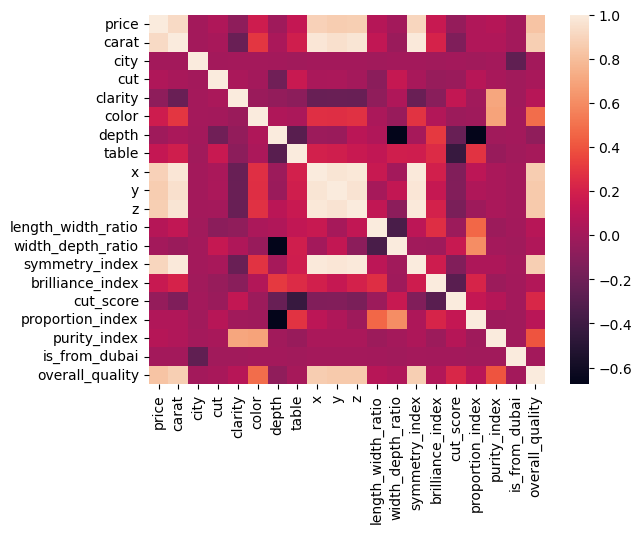

In [111]:
df_correlacion = diamonds_encoded[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

In [112]:
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

In [155]:
X.head()

,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,1.21,2,3,5,6,62.4,58.0,6.83,6.79,4.25,1.005891,1.597647,11.029475,0.006139,4,1.616526,5.5,1,4.430428
1,0.32,3,4,5,4,63.0,57.0,4.35,4.38,2.75,0.993151,1.592727,4.564090,0.006107,3,1.570984,4.5,0,2.728236
2,0.71,4,0,4,3,65.5,55.0,5.62,5.53,3.65,1.016275,1.515068,7.664655,0.006259,1,1.564785,3.5,0,2.747140
3,0.41,3,1,2,0,63.8,56.0,4.68,4.72,3.00,0.991525,1.573333,5.344258,0.006187,2,1.546780,1.0,0,1.979445
4,1.02,2,2,2,3,60.5,59.0,6.55,6.51,3.95,1.006144,1.648101,9.901821,0.006056,5,1.668417,2.5,1,3.815259


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (32364, 19), X_test: (8091, 19), y_train: (32364,), y_test: (8091,)


In [115]:
model_xgb = XGBRegressor(colsample_bytree = 0.95,
                          gamma = 0.14,
                          learning_rate = 0.012,
                          max_depth = 7,
                          missing = np.inf,
                          n_estimators = 1130,
                          subsample = 0.8, 
                         objective='reg:squarederror', random_state=42)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

In [116]:
mean_squared_error(y_test, y_pred)


284761.3198452044

In [117]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

533.6303213322913

In [156]:
diamonds_test = pd.read_csv('./data/diamonds_test.csv')
#diamonds_test['volume'] = (4/3) * np.pi * diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z']
diamonds_test['length_width_ratio'] = diamonds_test['x'] / diamonds_test['y']
diamonds_test['width_depth_ratio'] = diamonds_test['y'] / diamonds_test['z']
diamonds_test['symmetry_index'] = (diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z']) / (diamonds_test['x'] + diamonds_test['y'] + diamonds_test['z'])
diamonds_test['brilliance_index'] = diamonds_test['carat'] / (diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z'])
cut_score = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
diamonds_test['cut_score'] = diamonds_test['cut'].map(cut_score)
diamonds_test['proportion_index'] = (diamonds_test['x'] / diamonds_test['y']) * (diamonds_test['x'] / diamonds_test['z'])
diamonds_test['purity_index'] = (diamonds_test['clarity'].astype('category').cat.codes + diamonds_test['color'].astype('category').cat.codes) / 2
diamonds_test['is_from_dubai'] = np.where(diamonds_test['city'] == 'Dubai', 1, 0)
diamonds_test['overall_quality'] = diamonds_test[['symmetry_index', 'brilliance_index', 'cut_score', 'proportion_index', 'purity_index']].mean(axis=1)

diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam,0.988115,1.604905,8.179900,0.006279,3,1.566984,2.0,0,2.950633
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat,0.988389,1.648325,10.969204,0.006118,5,1.610270,5.0,0,4.517118
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly,1.008197,1.601751,12.811557,0.006359,4,1.628116,3.0,0,4.289207
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly,0.993475,1.571795,9.031863,0.006182,3,1.551349,2.0,0,3.117879
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam,0.992141,1.595611,6.151339,0.006098,3,1.570631,3.0,0,2.745614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam,1.005639,1.612121,6.723307,0.006069,5,1.630354,1.5,0,2.971946
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City,0.996510,1.609551,7.765143,0.006096,5,1.598334,5.0,0,3.873915
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv,1.007005,1.617564,7.731736,0.006040,5,1.640306,3.0,0,3.475616
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat,0.993209,1.707246,7.825867,0.005889,3,1.684137,2.5,0,3.003179


In [157]:
columns_to_encode = ['city','cut','clarity','color']

In [158]:
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam,0.988115,1.604905,8.179900,0.006279,3,1.566984,2.0,0,2.950633
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat,0.988389,1.648325,10.969204,0.006118,5,1.610270,5.0,0,4.517118
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly,1.008197,1.601751,12.811557,0.006359,4,1.628116,3.0,0,4.289207
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly,0.993475,1.571795,9.031863,0.006182,3,1.551349,2.0,0,3.117879
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam,0.992141,1.595611,6.151339,0.006098,3,1.570631,3.0,0,2.745614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam,1.005639,1.612121,6.723307,0.006069,5,1.630354,1.5,0,2.971946
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City,0.996510,1.609551,7.765143,0.006096,5,1.598334,5.0,0,3.873915
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv,1.007005,1.617564,7.731736,0.006040,5,1.640306,3.0,0,3.475616
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat,0.993209,1.707246,7.825867,0.005889,3,1.684137,2.5,0,3.003179


In [159]:
diamonds_encoded_test = diamonds_test.copy()  # Hacemos una copia del DataFrame original para no modificarlo directamente
for column in columns_to_encode:
    diamonds_encoded_test[column] = label_encoder.fit_transform(diamonds_test[column])

In [165]:
orden = ['carat','city','cut','clarity','color','depth','table','x','y','z','length_width_ratio','width_depth_ratio','symmetry_index','brilliance_index','cut_score','proportion_index','purity_index','is_from_dubai','overall_quality']
diamonds_encoded_test = diamonds_encoded_test[orden]
diamonds_encoded_test

,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,0.79,0,4,2,2,62.7,60.0,5.82,5.89,3.67,0.988115,1.604905,8.179900,0.006279,3,1.566984,2.0,0,2.950633
1,1.20,10,2,4,6,61.0,57.0,6.81,6.89,4.18,0.988389,1.648325,10.969204,0.006118,5,1.610270,5.0,0,4.517118
2,1.57,3,3,2,4,62.2,61.0,7.38,7.32,4.57,1.008197,1.601751,12.811557,0.006359,4,1.628116,3.0,0,4.289207
3,0.90,3,4,2,2,63.8,54.0,6.09,6.13,3.90,0.993475,1.571795,9.031863,0.006182,3,1.551349,2.0,0,3.117879
4,0.50,0,4,4,2,62.9,58.0,5.05,5.09,3.19,0.992141,1.595611,6.151339,0.006098,3,1.570631,3.0,0,2.745614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,0,2,2,1,61.9,56.0,5.35,5.32,3.30,1.005639,1.612121,6.723307,0.006069,5,1.630354,1.5,0,2.971946
13481,0.71,8,2,5,5,62.2,55.0,5.71,5.73,3.56,0.996510,1.609551,7.765143,0.006096,5,1.598334,5.0,0,3.873915
13482,0.70,11,2,4,2,61.6,55.0,5.75,5.71,3.53,1.007005,1.617564,7.731736,0.006040,5,1.640306,3.0,0,3.475616
13483,0.70,10,4,3,2,58.8,57.0,5.85,5.89,3.45,0.993209,1.707246,7.825867,0.005889,3,1.684137,2.5,0,3.003179


In [166]:
#X_prueba = diamonds_encoded_test.drop('id', axis=1)
X_prueba = diamonds_encoded_test

In [167]:
X_prueba

,carat,city,cut,clarity,color,depth,table,x,y,z,length_width_ratio,width_depth_ratio,symmetry_index,brilliance_index,cut_score,proportion_index,purity_index,is_from_dubai,overall_quality
0,0.79,0,4,2,2,62.7,60.0,5.82,5.89,3.67,0.988115,1.604905,8.179900,0.006279,3,1.566984,2.0,0,2.950633
1,1.20,10,2,4,6,61.0,57.0,6.81,6.89,4.18,0.988389,1.648325,10.969204,0.006118,5,1.610270,5.0,0,4.517118
2,1.57,3,3,2,4,62.2,61.0,7.38,7.32,4.57,1.008197,1.601751,12.811557,0.006359,4,1.628116,3.0,0,4.289207
3,0.90,3,4,2,2,63.8,54.0,6.09,6.13,3.90,0.993475,1.571795,9.031863,0.006182,3,1.551349,2.0,0,3.117879
4,0.50,0,4,4,2,62.9,58.0,5.05,5.09,3.19,0.992141,1.595611,6.151339,0.006098,3,1.570631,3.0,0,2.745614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,0,2,2,1,61.9,56.0,5.35,5.32,3.30,1.005639,1.612121,6.723307,0.006069,5,1.630354,1.5,0,2.971946
13481,0.71,8,2,5,5,62.2,55.0,5.71,5.73,3.56,0.996510,1.609551,7.765143,0.006096,5,1.598334,5.0,0,3.873915
13482,0.70,11,2,4,2,61.6,55.0,5.75,5.71,3.53,1.007005,1.617564,7.731736,0.006040,5,1.640306,3.0,0,3.475616
13483,0.70,10,4,3,2,58.8,57.0,5.85,5.89,3.45,0.993209,1.707246,7.825867,0.005889,3,1.684137,2.5,0,3.003179


In [168]:
y_prueba = model_xgb.predict(X_prueba)

In [169]:
y_prueba


array([2882.022 , 5563.0254, 9684.254 , ..., 3059.0737, 2120.116 ,
        829.3654], dtype=float32)

In [170]:
solution = []
for i, value in enumerate(y_prueba):
    solution.append((i,value))
    

In [171]:
solution_df = pd.DataFrame(solution)


In [172]:
solution_df.columns = ['id', 'price']

In [173]:
solution_df['price'].to_csv('solution.csv')